## Loading Libraries

In [ ]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.metrics import root_mean_squared_error
import numpy as np

## Loading Data

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pre-Processing data

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df = df[df["Glucose"]!=0]

In [13]:
df = df[df["BMI"]!=0]

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,69.704787,20.715426,81.348404,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,18.322255,15.930487,115.925034,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
X = df.drop(columns = ["Glucose"])

In [18]:
y = df["Glucose"]

[]

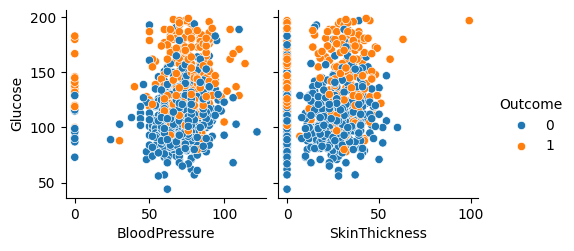

In [19]:
sns.pairplot(data = df,x_vars = ['BloodPressure', 'SkinThickness'],y_vars = ["Glucose"],hue='Outcome')
plt.plot()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 
#target variable is continuous (CTS) (regression), stratification does not directly work because there are no discrete classes to preserve

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
# Works for one col for x and one col for y
# sns.regplot(x = ["Pregnancies",'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],y=['Glucose'],data =df)

## Model Training and Testing [using all features]

In [31]:
reg = LinearRegression()

In [32]:
reg

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
reg.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
y_pred = reg.predict(X_test)

In [35]:
reg.score(X_test,y_test)

0.3282802627263197

## Model Training and Testing [using BMI]

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,69.704787,20.715426,81.348404,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,18.322255,15.930487,115.925034,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
X = df[["BMI"]]
y = df[["Glucose"]]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [41]:
y_pred = reg.predict(X_test)

In [42]:
reg.score(X_test,y_test) # using R^2 metrics

0.03262043402829107

In [43]:
rmse = root_mean_squared_error(y_test,y_pred)

In [52]:
rmse

30.83588845768167

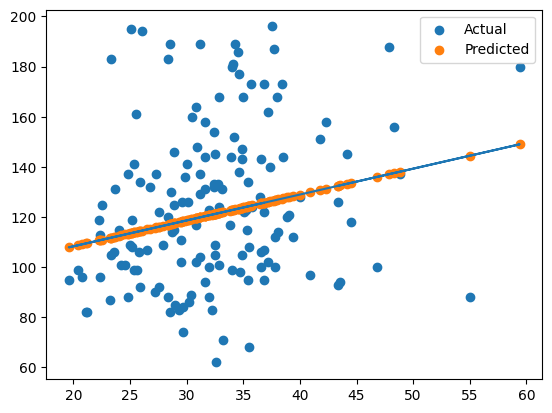

In [44]:
plt.plot(X_test,y_pred) #Plot y versus x as lines and/or markers.
# Problem : plt.plot() it will connect all dots and show predicted values as staright line, which can cause confusion
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.legend()
plt.show()

In [55]:
reg.coef_

array([[1.03251219]])

In [56]:
reg.intercept_

array([87.67196575])

## Cross Validation

In [45]:
folds = KFold(n_splits=6,shuffle = True,random_state=1729)

In [46]:
folds

KFold(n_splits=6, random_state=1729, shuffle=True)

In [47]:
reg = LinearRegression()

In [48]:
X = df[["BMI"]]
y = df[["Glucose"]]

In [49]:
cvs = cross_val_score(reg,X,y,cv = folds)

In [50]:
cvs

array([0.01551836, 0.05061041, 0.05868518, 0.00208545, 0.02158838,
       0.09989528])

In [51]:
np.mean(cvs)

np.float64(0.041397177003781614)

In [52]:
np.std(cvs)

np.float64(0.032693782215013484)

## Ridge and Lasso Regression

In [56]:
X = df[["BMI"]]
y = df[["Glucose"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 

In [57]:
for i in [0.1,1,2,5,10,15,25,50,10000]:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train,y_train)
    print(ridge.score(X_test,y_test))

0.03262044254192087
0.03262051911113506
0.03262060407520928
0.0326208582550509
0.03262127951493876
0.032621697810915506
0.032622525522968626
0.03262454314139884
0.0301150540094135


In [58]:
ridge.coef_

array([0.76980671])

In [59]:
for i in [0.1,1,2,5,10,15,25,50,10000]:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train,y_train)
    print(lasso.score(X_test,y_test))

0.03262519855015278
0.03265085336258633
0.032642992953943684
0.03238973327039263
0.031202038939059484
0.02905735103429108
0.021896994504449485
-0.013391770013934545
-0.013391770013934545


In [60]:
X = df.drop(columns = ["Glucose"])
y = df[["Glucose"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 

In [61]:
for i in [0.1,1,2,5,10,15,25,50,10000]:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train,y_train)
    print(lasso.score(X_test,y_test))

0.3284857694292622
0.3166121180165743
0.29479310083003485
0.17514045430083747
0.17121386697851615
0.16511621527681986
0.14640781449617357
0.11477890284329784
-0.013391770013934545


In [62]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
coef = lasso.coef_
coef

array([-0.30667925,  0.14507983, -0.27403449,  0.0865619 ,  0.37118267,
        0.91395934,  0.42494434, 24.63732771])

In [63]:
names = X.columns

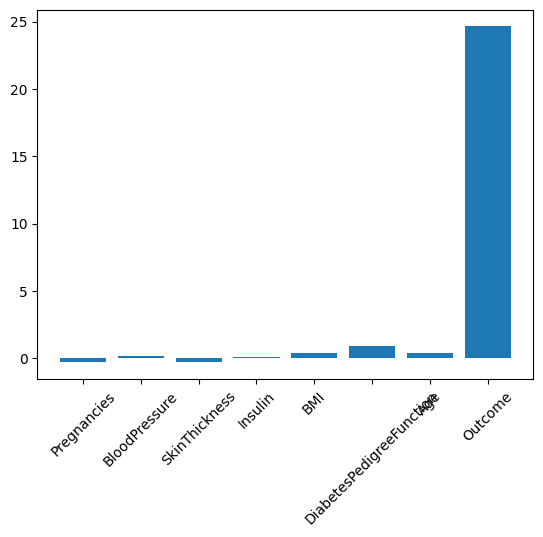

In [64]:
plt.bar(names, coef)
plt.xticks(rotation = 45)
plt.show()